In [1]:
import mysql.connector

In [2]:
remote = mysql.connector.connect(
    host = "eda-database.c3oek28e8yta.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "rlawlswo1",
    database = "workspace"
)

In [3]:
import pandas as pd

In [4]:
interest_rate_addr = "../data/소비자물가 상승률.xlsx"
df = pd.read_excel(interest_rate_addr, header=6, usecols="A,B")
interest_rate_addr2 = "../data/미국 소비자물가 상승률.xlsx"
df2 = pd.read_excel(interest_rate_addr2, header=6, usecols="A,B")

df.rename(columns={df.columns[0]:"date",
                   df.columns[1]:"k_price_index"},
                   inplace=True)

df2.rename(columns={df2.columns[0]:"date",
                   df2.columns[1]:"usa_price_index"},
                   inplace=True)

merge_df = pd.merge(df, df2, on="date")
merge_df.set_index(merge_df.columns[0], inplace=True)
merge_df.head()

,k_price_index,usa_price_index
date,,
1966-01,7.4,1.9
1966-02,8.1,2.6
1966-03,9.6,2.6
1966-04,9.0,2.9
1966-05,9.9,2.9


In [5]:
# df.loc["20190901":]
corona_interval = merge_df["2004-09":]
corona_interval.head()

,k_price_index,usa_price_index
date,,
2004-09,3.9,2.5
2004-10,3.8,3.2
2004-11,3.3,3.5
2004-12,3.0,3.3
2005-01,3.4,3.0


In [6]:
import numpy as np

In [7]:
monthly = []

for index, row in corona_interval.iterrows():
    # print(index, row["k_interest_rate"], row["usa_interest_rate"])
    # print(now_month)
    month_info = []

    month_info.append(index + str("-01"))
    month_info.append(float(row["k_price_index"]))
    month_info.append(float(row["usa_price_index"]))

    monthly.append(month_info)

monthly

[['2004-09-01', 3.9, 2.5],
 ['2004-10-01', 3.8, 3.2],
 ['2004-11-01', 3.3, 3.5],
 ['2004-12-01', 3.0, 3.3],
 ['2005-01-01', 3.4, 3.0],
 ['2005-02-01', 3.4, 3.0],
 ['2005-03-01', 3.0, 3.1],
 ['2005-04-01', 3.1, 3.5],
 ['2005-05-01', 3.1, 2.8],
 ['2005-06-01', 2.8, 2.5],
 ['2005-07-01', 2.6, 3.2],
 ['2005-08-01', 2.0, 3.6],
 ['2005-09-01', 2.5, 4.7],
 ['2005-10-01', 2.3, 4.3],
 ['2005-11-01', 2.5, 3.5],
 ['2005-12-01', 2.6, 3.4],
 ['2006-01-01', 2.2, 4.0],
 ['2006-02-01', 2.0, 3.6],
 ['2006-03-01', 2.0, 3.4],
 ['2006-04-01', 2.0, 3.5],
 ['2006-05-01', 2.3, 4.2],
 ['2006-06-01', 2.4, 4.3],
 ['2006-07-01', 2.4, 4.1],
 ['2006-08-01', 2.7, 3.8],
 ['2006-09-01', 2.5, 2.1],
 ['2006-10-01', 2.2, 1.3],
 ['2006-11-01', 2.1, 2.0],
 ['2006-12-01', 2.1, 2.5],
 ['2007-01-01', 1.7, 2.1],
 ['2007-02-01', 2.2, 2.4],
 ['2007-03-01', 2.2, 2.8],
 ['2007-04-01', 2.4, 2.6],
 ['2007-05-01', 2.3, 2.7],
 ['2007-06-01', 2.5, 2.7],
 ['2007-07-01', 2.5, 2.4],
 ['2007-08-01', 2.0, 2.0],
 ['2007-09-01', 2.3, 2.8],
 

In [8]:
monthly_df = pd.DataFrame(monthly, columns=["date", "k_price_index", "usa_price_index"])
# monthly_df.tail()
monthly_df.set_index("date", inplace=True)
monthly_df.tail()

,k_price_index,usa_price_index
date,,
2024-04-01,2.9,3.4
2024-05-01,2.7,3.3
2024-06-01,2.4,3.0
2024-07-01,2.6,2.9
2024-08-01,2.0,2.5


In [9]:
monthly_df.head()

,k_price_index,usa_price_index
date,,
2004-09-01,3.9,2.5
2004-10-01,3.8,3.2
2004-11-01,3.3,3.5
2004-12-01,3.0,3.3
2005-01-01,3.4,3.0


In [10]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib.colors import ListedColormap
import matplotlib.ticker as ticker
from matplotlib import dates
import matplotlib.dates as mdates
import datetime

In [11]:
temp = list(monthly_df.index)
len(temp)
np.arange(0, len(temp), 12)

array([  0,  12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144,
       156, 168, 180, 192, 204, 216, 228])

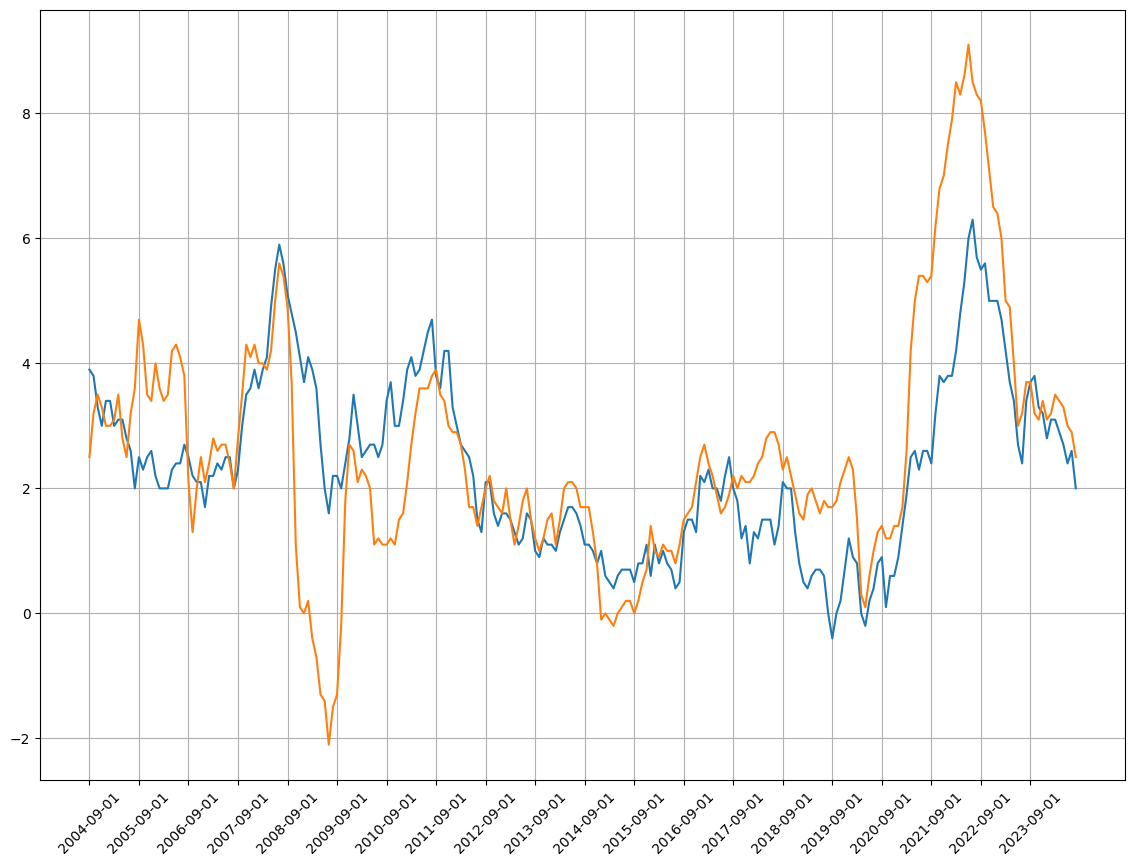

In [12]:
plt.figure(figsize=(14,10))
plt.plot(monthly_df)
plt.xticks(np.arange(0, len(temp), 12), rotation=45)
plt.grid()
plt.show()

In [13]:
import mysql.connector

In [14]:
remote = mysql.connector.connect(
    host = "eda-database.c3oek28e8yta.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "rlawlswo1",
    database = "workspace"
)

In [15]:
cur = remote.cursor()

sql = open("../sql_script/insert_price_index.sql").read()
for index, row in monthly_df.iterrows():
    temp = [index, float(row["k_price_index"]), float(row["usa_price_index"])]
    print(temp)
    cur.execute(sql, tuple(temp))
    remote.commit()

cur.execute("select * from price_index")
result = cur.fetchall()
for row in result:
    print(row)

['2004-09-01', 3.9, 2.5]
['2004-10-01', 3.8, 3.2]
['2004-11-01', 3.3, 3.5]
['2004-12-01', 3.0, 3.3]
['2005-01-01', 3.4, 3.0]
['2005-02-01', 3.4, 3.0]
['2005-03-01', 3.0, 3.1]
['2005-04-01', 3.1, 3.5]
['2005-05-01', 3.1, 2.8]
['2005-06-01', 2.8, 2.5]
['2005-07-01', 2.6, 3.2]
['2005-08-01', 2.0, 3.6]
['2005-09-01', 2.5, 4.7]
['2005-10-01', 2.3, 4.3]
['2005-11-01', 2.5, 3.5]
['2005-12-01', 2.6, 3.4]
['2006-01-01', 2.2, 4.0]
['2006-02-01', 2.0, 3.6]
['2006-03-01', 2.0, 3.4]
['2006-04-01', 2.0, 3.5]
['2006-05-01', 2.3, 4.2]
['2006-06-01', 2.4, 4.3]
['2006-07-01', 2.4, 4.1]
['2006-08-01', 2.7, 3.8]
['2006-09-01', 2.5, 2.1]
['2006-10-01', 2.2, 1.3]
['2006-11-01', 2.1, 2.0]
['2006-12-01', 2.1, 2.5]
['2007-01-01', 1.7, 2.1]
['2007-02-01', 2.2, 2.4]
['2007-03-01', 2.2, 2.8]
['2007-04-01', 2.4, 2.6]
['2007-05-01', 2.3, 2.7]
['2007-06-01', 2.5, 2.7]
['2007-07-01', 2.5, 2.4]
['2007-08-01', 2.0, 2.0]
['2007-09-01', 2.3, 2.8]
['2007-10-01', 3.0, 3.5]
['2007-11-01', 3.5, 4.3]
['2007-12-01', 3.6, 4.1]


In [16]:
remote.close()